In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv('/Users/Daniel/Documents/Research Projects/Cosmic Filaments/GAMA_OdeP6g.csv')    #imports CSV file as dataframe
df

,CATAID,RA,DEC,CATAID.1,Z,nQ,SURVEY_CODE,Z_TONRY,logmstar,dellogmstar
0,6802,174.00600,0.72093,6802,0.05054,4,5,0.051814,9.076030,0.131666
1,6806,174.02279,0.70594,6806,0.33124,4,5,0.332854,10.979200,0.099166
2,6808,174.10071,0.65891,6808,0.22936,4,5,0.230851,10.791600,0.098116
3,6810,174.10908,0.80390,6810,0.32630,4,5,0.327908,11.119700,0.096136
4,6816,174.01896,0.66580,6816,0.07641,4,5,0.077715,9.012390,0.146456
...,...,...,...,...,...,...,...,...,...,...
113153,4321789,219.54175,1.20398,4321789,0.29884,4,5,0.299822,10.410600,0.131773
113154,4322179,220.18208,1.03991,4322179,0.22929,3,5,0.230207,9.689020,0.164714
113155,4327264,215.73183,1.66110,4327264,0.00006,4,5,0.000001,0.464692,0.168939
113156,4327642,222.77558,1.53559,4327642,0.00034,4,5,0.000004,1.253310,0.103429


In [2]:
check_nan = df['Z'].isnull().values.any() #sanity check (no redshifts should be 0)
check_nan

False

In [3]:
def EuclideanCords(RA, DEC, Z):
    '''Converts spherical coordinates ra, dec, and z to cartesian x, y, z coordinates'''
    Ho = 67.8
    sl = 2.99792458e+5

    numer = ((1+Z)**2)-1
    denom = ((1+Z)**2)+1
    H = sl/Ho
    radius = (numer/denom)*H    # gives radius

    for i in Z:
        d = radius
    
    RArad = RA * (np.pi/180)     # converting RA and DEC into radians 
    DECrad = DEC * (np.pi/180)

    cos = np.cos      # easier this way rather than typing "np.sin" everytime
    sin = np.sin

    x = d*cos(RArad)*cos(DECrad)
    y = d*sin(RArad)*cos(DECrad)
    z = d*sin(DECrad)
    return x, y, z


In [4]:
RA = df['RA']
DEC = df['DEC']
Z = df['Z']
mstar = df['logmstar']

x = EuclideanCords(RA, DEC, Z)[0]
y = EuclideanCords(RA, DEC, Z)[1]
z = EuclideanCords(RA, DEC, Z)[2]

In [5]:
normed_mstar = mstar / np.linalg.norm(mstar) #makes unit vectors
normed_mstar

0         0.002414
1         0.002920
2         0.002870
3         0.002957
4         0.002397
            ...   
113153    0.002769
113154    0.002577
113155    0.000124
113156    0.000333
113157    0.002613
Name: logmstar, Length: 113158, dtype: float64

/Users/Daniel/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


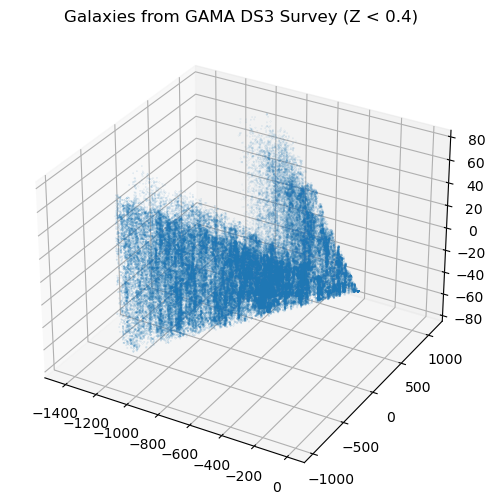

In [6]:
# 3d plot of coordinates
# %matplotlib widget

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Galaxies from GAMA DS3 Survey (Z < 0.4)')
ax.scatter(x,y,z, s=normed_mstar*2)
plt.show()

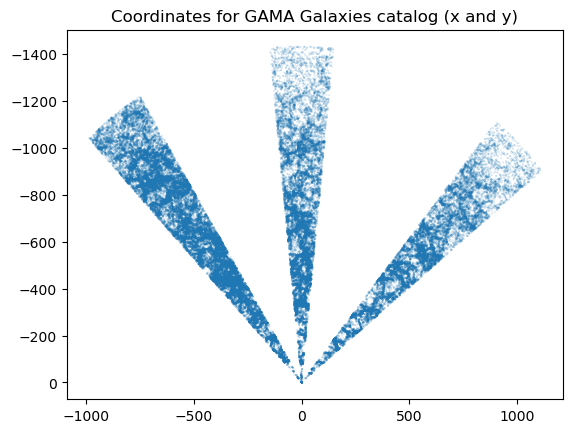

In [7]:
# 2d plot 
plt.scatter(y, x, s =normed_mstar*2)
plt.gca().invert_yaxis()
plt.title("Coordinates for GAMA Galaxies catalog (x and y)")
plt.show()

In [8]:
# Create vector of all 4 columns
cords = np.column_stack([x, y, z, mstar])
np.shape(cords)    # shape: (rows, columns)

(113158, 4)

In [ ]:
# save as text file (comment out until you are ready to save)
#np.savetxt("Gama_Catalog_Euclidean.csv", cords)

In [9]:
# recreate dataframe (easier on the eyes)
df2 = pd.DataFrame({'px':x, 'py': y, 'pz': z, 'logmstar': mstar})
df2

,px,py,pz,logmstar
0,-216.625210,22.745292,2.740837,9.076030
1,-1224.886159,128.248150,15.175059,10.979200
2,-895.469883,92.526596,10.353321,10.791600
3,-1209.953065,124.842693,17.067738,11.119700
4,-323.199357,33.861492,3.776433,9.012390
...,...,...,...,...
113153,-871.610163,-719.567317,23.754061,10.410600
113154,-687.527336,-580.637147,16.334981,9.689020
113155,-0.215265,-0.154865,0.007690,0.464692
113156,-1.102929,-1.020451,0.040281,1.253310
